## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling Age + Pop Density](#Regression-Modeling-Age-+-Pop-Density)  
- [Reg Model: 0-35, 35-59, 60-84, 85+](#Reg-Model:-0-35,-35-59,-60-84,-85+)
- [Reg Model: 0-44, 45-75, 75+](#-Reg-Model:-0-44,-45-75,-75+)
- [Reg Model: 0-64, 65+](#Reg-Model:-0-64,-65+)
- [Reg Model: Median Age](#Reg-Model:-Median-Age)
- [Correlations age](#Correlations-age)
- [Correlations the whole df](#Correlations-the-whole-df)
- [Regression Modeling Sex](#Regression-Modeling-Sex)

# Imports

In [62]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [63]:
# Import the data.
df = pd.read_csv('../data/cleaned_numbers_five_states.csv')

In [64]:
# Display the first few rows of the dataframe.
df.head(3)

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,inc_per_capita_inc_dol,inc_med_earn_workers_dol,inc_med_earn_male_full_yr_workers_dol,inc_med_earn_female_full_yr_workers_dol,deaths_per_100_cases,cases_per_100_people,tests_per_100_people,pop_density
0,"Santa Clara County, California",23978.0,388.0,0.016181,839764,1922200,495455,615912,45379,3003,...,116178,154183,52451,52592,90862,64739,1.618150,1.247425,43.687650,1488.824137
1,"San Mateo County, California",10942.0,159.0,0.014531,285657,765935,189002,303047,16838,1151,...,113776,162639,57375,51601,79347,65524,1.453116,1.428581,37.295201,1707.252650
2,"Santa Barbara County, California",9781.0,120.0,0.012269,158693,443738,200060,199356,7881,1407,...,71657,101100,34229,28250,48314,41964,1.226868,2.204229,35.762770,162.235996


In [65]:
# Display information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 59 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   county_state                                               543 non-null    object 
 1   total_cases                                                543 non-null    float64
 2   total_fatalities                                           543 non-null    float64
 3   death_rate                                                 542 non-null    float64
 4   total_tests                                                543 non-null    int64  
 5   race_pop                                                   543 non-null    int64  
 6   race_pop_hispanic_or_latino_of_any_race                    543 non-null    int64  
 7   race_pop_white_alone                                       543 non-null    int64  
 8   race_pop_b

In [66]:
# Set the county name to the index.
df = df.set_index('county_state')

# Regression Modeling Age + Pop Density

In [194]:
# Create a subset of age demographic columns for modeling.
# Extract columns for age-based model.
age_mod_cols = [
    'deaths_per_100_cases', 'cases_per_100_people', 'tests_per_100_people', 'sex_age_pop', 'sex_age_pop_male', 
    'sex_age_pop_female', 'sex_age_pop_under_5', 'sex_age_pop_5_to_9', 'sex_age_pop_10_to_14', 'sex_age_pop_15_to_19',
    'sex_age_pop_20_to_24', 'sex_age_pop_25_to_34', 'sex_age_pop_35_to_44', 'sex_age_pop_45_to_54',
    'sex_age_pop_55_to_59', 'sex_age_pop_60_to_64', 'sex_age_pop_65_to_74', 'sex_age_pop_75_to_84',
    'sex_age_pop_85_and_over', 'pop_density', 'sex_age_median_age_in_years'
]

In [195]:
# Create a dataframe for age groups
df_age = df[age_mod_cols]

## Reg Model: 0-35, 35-59, 60-84, 85+

In [196]:
df_age['sex_age_pop_0_to_35'] = df_age['sex_age_pop_under_5'] + df_age['sex_age_pop_5_to_9']\
                        + df_age['sex_age_pop_10_to_14'] + df_age['sex_age_pop_15_to_19']\
                        + df_age['sex_age_pop_20_to_24'] + df_age['sex_age_pop_25_to_34']

In [197]:
df_age['sex_age_pop_35_to_59'] = df_age['sex_age_pop_35_to_44'] + df_age['sex_age_pop_45_to_54'] \
                        + df_age['sex_age_pop_55_to_59']

In [198]:
df_age['sex_age_pop_60_to_84'] = df_age['sex_age_pop_60_to_64'] + df_age['sex_age_pop_65_to_74'] \
                        + df_age['sex_age_pop_75_to_84']

In [199]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
    return

In [200]:
# Apply the function to the numbers dataframe
to_percentage(df_age)

In [201]:
list(df_age.columns)

['deaths_per_100_cases',
 'cases_per_100_people',
 'tests_per_100_people',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'pop_density',
 'sex_age_median_age_in_years',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_74'

In [202]:
X = df_age[[
    'percent_sex_age_pop_0_to_35',
    'percent_sex_age_pop_35_to_59',
    'percent_sex_age_pop_60_to_84',
    'percent_sex_age_pop_85_and_over',
    'pop_density'
]]

y = df_age['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [203]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [204]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [205]:
X_train.shape, y_test.shape

((407, 4), (136,))

In [206]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.03553766378462235

## Reg Model: 0-44, 45-75, 75+

In [207]:
df_age['sex_age_pop_0_to_44'] = df_age['sex_age_pop_under_5'] + df_age['sex_age_pop_5_to_9'] \
                    + df_age['sex_age_pop_10_to_14'] + df_age['sex_age_pop_15_to_19'] \
                    + df_age['sex_age_pop_20_to_24'] + df_age['sex_age_pop_25_to_34'] + df_age['sex_age_pop_35_to_44']

In [208]:
df_age['sex_age_pop_45_to_74'] = df_age['sex_age_pop_45_to_54'] + df_age['sex_age_pop_55_to_59'] \
                    + df_age['sex_age_pop_60_to_64'] + df_age['sex_age_pop_65_to_74']

In [209]:
df_age['sex_age_pop_75_and_over'] = df_age['sex_age_pop_75_to_84'] + df_age['sex_age_pop_85_and_over']

In [210]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
    
    return

In [211]:
# Apply the function to the numbers dataframe
to_percentage(df_age)

In [212]:
list(df_age.columns)

['deaths_per_100_cases',
 'cases_per_100_people',
 'tests_per_100_people',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'pop_density',
 'sex_age_median_age_in_years',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_74'

In [214]:
X = df_age[[
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'pop_density'
]]

y = df_age['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [215]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [216]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [217]:
X_train.shape, y_test.shape

((407, 3), (136,))

In [218]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.03800103955093288

## Reg Model: 0-64, 65+

In [219]:
df_age['sex_age_pop_0_to_64'] = df_age['sex_age_pop_under_5'] + df_age['sex_age_pop_5_to_9'] + df_age['sex_age_pop_10_to_14']\
                                + df_age['sex_age_pop_15_to_19'] + df_age['sex_age_pop_20_to_24'] + df_age['sex_age_pop_25_to_34'] \
                                + df_age['sex_age_pop_35_to_44'] + df_age['sex_age_pop_45_to_54'] + df_age['sex_age_pop_55_to_59'] \
                                + df_age['sex_age_pop_60_to_64']

In [220]:
df_age['sex_age_pop_65_and_over'] = df_age['sex_age_pop_65_to_74'] + df_age['sex_age_pop_75_to_84'] + df_age['sex_age_pop_85_and_over']

In [221]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
    return

In [222]:
# Apply the function to the numbers dataframe
to_percentage(df_age)

In [223]:
list(df_age.columns)

['deaths_per_100_cases',
 'cases_per_100_people',
 'tests_per_100_people',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'pop_density',
 'sex_age_median_age_in_years',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_74'

In [235]:
X = df_age[[
    'percent_sex_age_pop_0_to_64',
    'percent_sex_age_pop_65_and_over',
    'pop_density',
]]

y = df_age['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [236]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [237]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [238]:
X_train.shape, y_test.shape

((407, 3), (136,))

In [239]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.004457753602039061

## Reg Model: Median Age

In [240]:
X = df_age[[
    'sex_age_median_age_in_years',
    'pop_density',
]]

y = df_age['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [241]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [242]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [243]:
X_train.shape, y_test.shape

((407, 2), (136,))

In [244]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.03520643769785212

## Reg Model: Median Age + 25-34

In [245]:
X = df_age[[
    'sex_age_median_age_in_years',
    'percent_sex_age_pop_25_to_34',
    'pop_density',
]]

y = df_age['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [246]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [247]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [248]:
X_train.shape, y_test.shape

((407, 3), (136,))

In [249]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.0638338242164818

# Correlations age

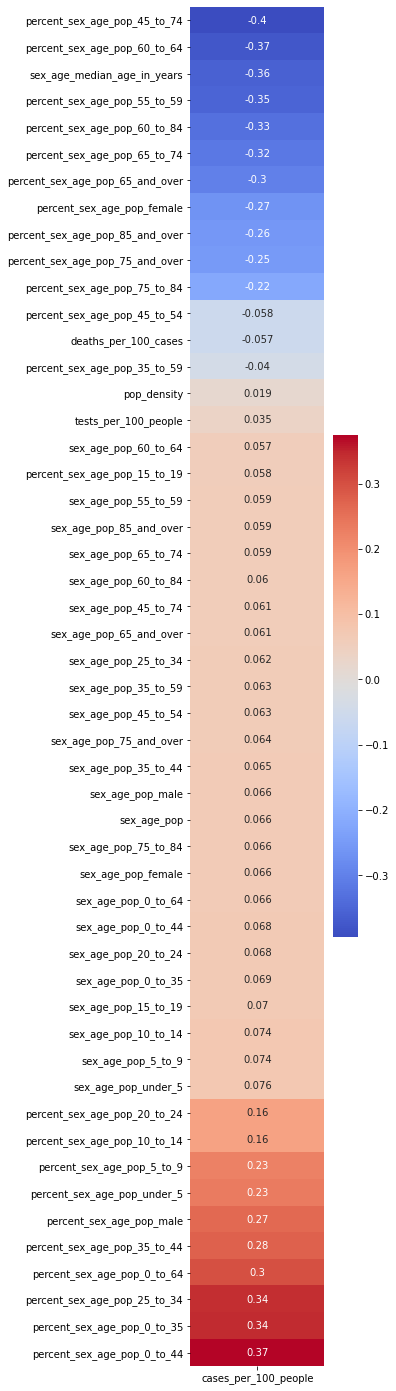

In [126]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = df_age.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 25))
sns.heatmap(corr[['cases_per_100_people']].sort_values(by='cases_per_100_people').iloc[:-1], annot=True, cmap = 'coolwarm');

# Regression Modeling Sex

In [148]:
list(df.columns)

['total_cases',
 'total_fatalities',
 'death_rate',
 'total_tests',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'obes_percent',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop

In [149]:
# Create a subset of sex demographic columns for modeling.
# Extract columns for sex-based model.
sex_mod_cols = ['sex_age_pop', 'sex_age_pop_male', 'sex_age_pop_female', 'pop_density', 'cases_per_100_people']

In [150]:
# Create a dataframe for age groups
df_sex = df[sex_mod_cols]

In [152]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
        if column.startswith('sex_age_pop_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['sex_age_pop']
            
    return

In [153]:
to_percentage(df_sex)

In [154]:
df_sex

,sex_age_pop,sex_age_pop_male,sex_age_pop_female,pop_density,cases_per_100_people,percent_sex_age_pop_male,percent_sex_age_pop_female
county_state,,,,,,,
"Santa Clara County, California",1922200,970469,951731,1488.824137,1.247425,0.504874,0.495126
"San Mateo County, California",765935,377851,388084,1707.252650,1.428581,0.493320,0.506680
"Santa Barbara County, California",443738,222208,221530,162.235996,2.204229,0.500764,0.499236
"Tuolumne County, California",53932,28102,25830,24.283958,0.498776,0.521064,0.478936
"Sierra County, California",2930,1542,1388,3.073960,0.204778,0.526280,0.473720
...,...,...,...,...,...,...,...
"Wood County, Texas",43815,21807,22008,67.904439,1.428734,0.497706,0.502294
"Yoakum County, Texas",8571,4438,4133,10.717568,3.371835,0.517793,0.482207
"Young County, Texas",18114,8930,9184,19.807588,2.953517,0.492989,0.507011


In [185]:
X = df_sex[[
    'percent_sex_age_pop_male',
    'pop_density',
]]

y = df_sex['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [186]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [187]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [188]:
X_train.shape, y_test.shape

((407, 2), (136,))

In [189]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.027103869014526615